# Refs
* A Gentle Introduction to Graph Neural Networks: https://distill.pub/2021/gnn-intro
* Understanding Convolutions on Graphs: https://distill.pub/2021/understanding-gnns

# What are Graphs?

- **Definition**: A graph is a mathematical structure consisting of:
  - Vertices (nodes): Represent entities
  - Edges: Represent relationships between entities

- Powerful way to represent complex, interconnected data
- Capture relationships and interactions in various domains

# Why are Graphs Important?

- **Versatility**: Can model a wide range of systems and phenomena
  - From microscopic (protein interactions) to macroscopic (internet topology)

- **Intuitive Representation**: Natural way to visualize and understand relationships

- **Rich Information**: Capture both individual properties and system-wide patterns

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torch, random
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [ ]:
# Create a simple graph
def create_social_network(num_nodes=6, min_edges=5, max_edges=15):

    G = nx.Graph()
    edges = set()

    num_edges = random.randint(min_edges, max_edges)

    while len(edges) < num_edges:
        a = random.randint(0, num_nodes - 1)
        b = random.randint(0, num_nodes - 1)
        if a != b:
            # Ensure (a, b) and (b, a) are treated as the same edge
            edges.add((min(a, b), max(a, b)))

    G.add_edges_from(list(edges))
    return G

# Visualize the graph
def visualize_graph(G, node_colors, title="Social Network", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=node_colors, with_labels=True,
            node_size=500, font_size=16, font_weight='bold', ax=ax)
    ax.set_title(title)
    if ax is None:
        plt.show()

# Visualize the adjacency matrix
def visualize_adjacency_matrix(G):
    plt.figure(figsize=(8, 6))
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    plt.imshow(adj_matrix, cmap='viridis')
    plt.title("Adjacency Matrix")
    plt.colorbar()

    # Add node labels
    node_labels = sorted(G.nodes())
    plt.xticks(range(len(node_labels)), node_labels)
    plt.yticks(range(len(node_labels)), node_labels)

    plt.show()

In [ ]:
# Create the graph
num_nodes = 100  # You can change this value
G = create_social_network(num_nodes=num_nodes, min_edges=120, max_edges=2000)

# Assign features and labels
num_nodes = G.number_of_nodes()
node_features = 10
num_classes = 2

# Random node features
x = torch.randn((num_nodes, node_features))

# Assign labels: 0 for 'regular user', 1 for 'influential user'
y = torch.randint(0, num_classes, (num_nodes,))

# Create edge index
edge_index = torch.tensor(list(G.edges())).t().contiguous()

# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)

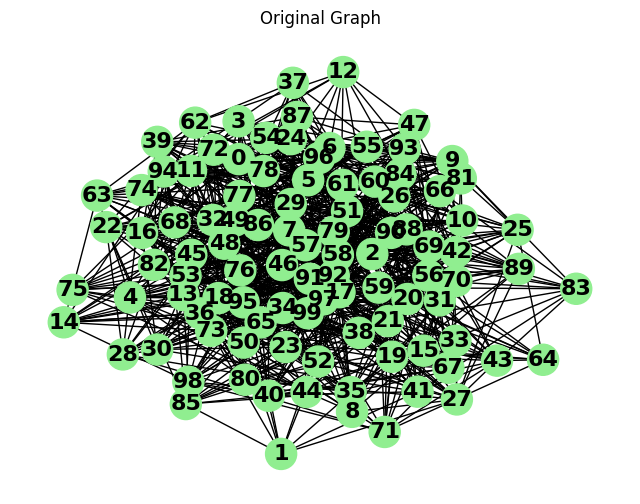

In [ ]:
# Visualize graph before training
node_colors_original = ['lightblue' if label == 0 else 'lightgreen'
                        for label in np.ones_like(data.y)]
visualize_graph(G, node_colors_original, title="Original Graph")

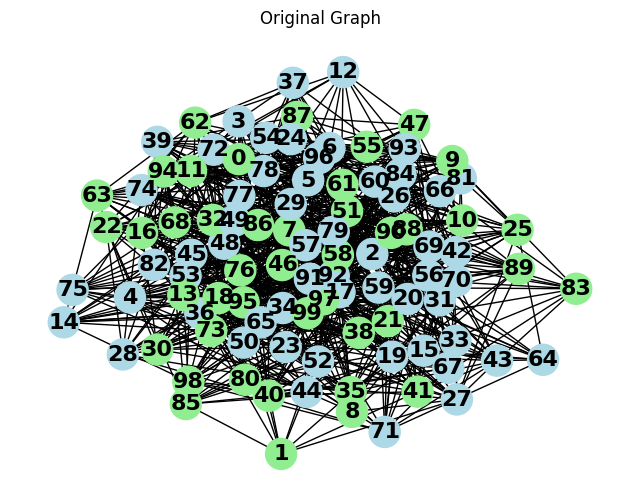

In [ ]:
# Graph with target variables
node_colors_original = ['lightblue' if label == 0 else 'lightgreen'
                        for label in data.y]
visualize_graph(G, node_colors_original, title="Original Graph")

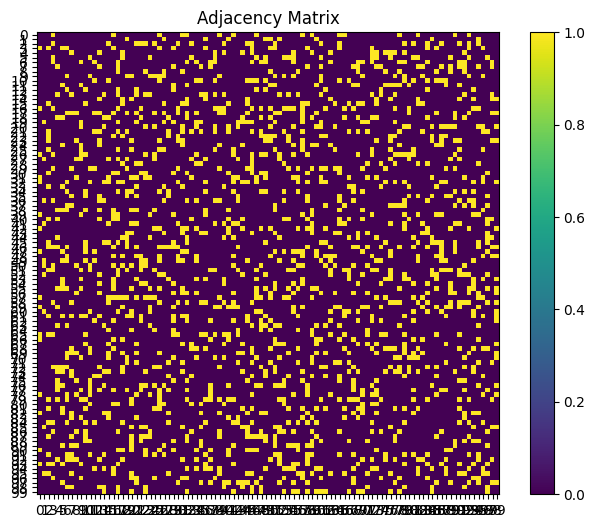

In [ ]:
# Visualise the adjacency matrix
visualize_adjacency_matrix(G)

# Introducing Graph Neural Networks (GNNs)

We wish to learn the representations (embeddings) for nodes, edges, or entire graphs.

- **What are GNNs?**
  - Deep learning models designed to work directly on graph-structured data

- **Why do we need GNNs?**
  - Traditional neural networks struggle with graph data
  - GNNs can learn from both node features and graph structure

- **Advantages**:
  - Can handle varying graph sizes and structures
  - Preserve graph properties in learned representations
  - Enable inductive learning on previously unseen nodes/graphs

- **Preview of Applications**:
  - Node classification (e.g., identifying user interests in a social network)
  - Link prediction (e.g., recommending new connections)
  - Graph classification (e.g., predicting properties of molecules)
  - Other stuff.. Graph discovery, embeddings, etc.

In [ ]:
# Define a simple GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GNN()

In [ ]:
# Train the model (simplified for demonstration)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred == data.y).sum()
acc = int(correct) / len(data.y)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7200


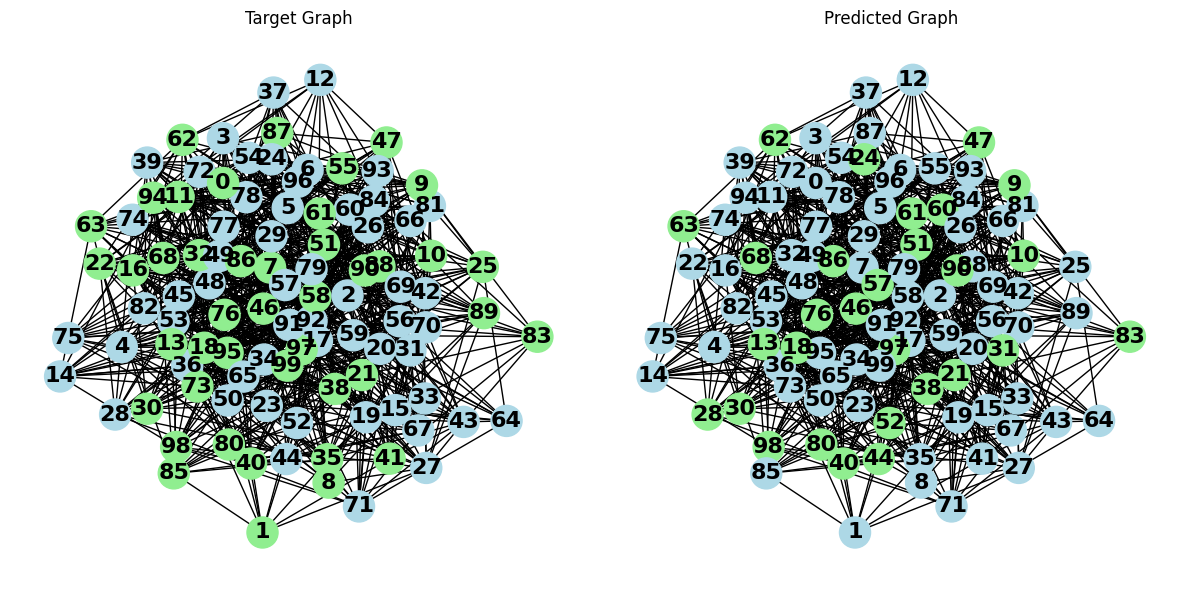

In [ ]:
# Visualize graph before training and after prediction side by side
node_colors_original = ['lightblue' if label == 0 else 'lightgreen'
                        for label in data.y]
node_colors_predicted = ['lightblue' if label == 0 else 'lightgreen'
                         for label in pred]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

visualize_graph(G, node_colors_original, title="Target Graph", ax=ax1)
visualize_graph(G, node_colors_predicted, title="Predicted Graph", ax=ax2)

plt.tight_layout()
plt.show()

# Graphs in astronomy
* Core-collapse supernova signals in GW data*
* Interrelations of various channel data in a GW detector*
* Gravitationally lensed galaxies
* Galaxy/Star clusters
* Other ideas?